# Sentiment Analiz
Sentiment Analiz: bir yazinin olumlu mu olumsuz mu oldugunu anlamaya

## Modelin Yapisi

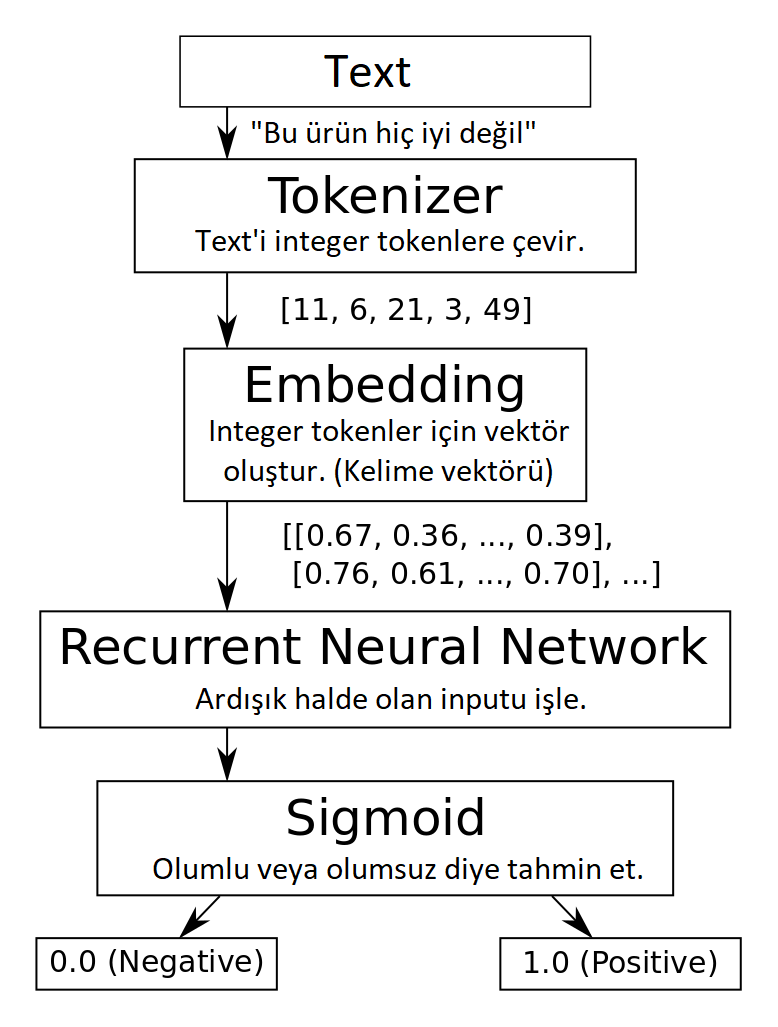

In [4]:
import numpy as np
import pandas as pd


In [5]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, GRU, Embedding
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


## 1.) data read

In [6]:
dataset=pd.read_csv('hepsiburada.csv')

In [7]:
dataset

,Rating,Review
0,1,3 yıldır tık demedi. :)
1,1,3 yıldır kullanıyorum müthiş
2,1,Ürün bugün elime geçti çok fazla inceleme fırs...
3,1,Almaya karar verdim. Hemencecik geldi. Keyifle...
4,1,Günlük kullanımınızı çok çok iyi karsılıyor kı...
...,...,...
243492,1,fiyatına göre güzel
243493,1,Ürün kullanışlı iş görüyor fazlasıyla eşime al...
243494,1,"Hızlı Kargo, güzel ürün"
243495,1,telefon başarılı hızlı bir cihaz sadece beyaz...


## 2.) Data split

In [8]:
target=dataset['Rating'].values.tolist()# etiketleri listeye aldik
data=dataset['Review'].values.tolist()# review leri liste olarak aldik

In [9]:
cutoff=int(len(data)*0.80)
x_train,x_test=data[:cutoff],data[cutoff:]
y_train,y_test=target[:cutoff],target[cutoff:]

In [10]:
x_train[500]

'ürün sipariş verdim 2 gün içinde elime ulaştı her zaman ki gibi kullanışlı bi ürün daha once de bu mouse dan almıştım.bu yüzden tereddütsüz aldım . alacak olanlara öneririm'

In [11]:
y_train[500]# bu yorumun target i

1

## Tokenlestirme

In [12]:
num_words=10000# en sik gecen 10000 kelimeyi aliyoruz
tokenizer=Tokenizer(num_words=num_words)

In [13]:
tokenizer.fit_on_texts(data)

In [14]:
tokenizer.word_index# data setden belirlenen her kelimeye bir sayi geliyor 10000 e kadar.

{'çok': 1,
 'bir': 2,
 've': 3,
 'ürün': 4,
 'bu': 5,
 'iyi': 6,
 'güzel': 7,
 'için': 8,
 'tavsiye': 9,
 'ederim': 10,
 'daha': 11,
 'ama': 12,
 'da': 13,
 'gayet': 14,
 'hızlı': 15,
 'teşekkürler': 16,
 'aldım': 17,
 'de': 18,
 'ürünü': 19,
 'gibi': 20,
 'yok': 21,
 'uygun': 22,
 'olarak': 23,
 'kaliteli': 24,
 'en': 25,
 '2': 26,
 'kargo': 27,
 'fiyat': 28,
 'elime': 29,
 'kadar': 30,
 'ile': 31,
 'göre': 32,
 'geldi': 33,
 'var': 34,
 'hepsiburada': 35,
 'ben': 36,
 'gerçekten': 37,
 '1': 38,
 'fiyata': 39,
 'gün': 40,
 'sonra': 41,
 'cok': 42,
 'kesinlikle': 43,
 'telefon': 44,
 'biraz': 45,
 'hiç': 46,
 'ulaştı': 47,
 'memnun': 48,
 'hem': 49,
 'değil': 50,
 'kullanışlı': 51,
 '3': 52,
 'mükemmel': 53,
 'oldu': 54,
 'kullanıyorum': 55,
 'önce': 56,
 'sipariş': 57,
 'tek': 58,
 'her': 59,
 'bence': 60,
 'harika': 61,
 'kalitesi': 62,
 'bi': 63,
 'ayrıca': 64,
 '5': 65,
 'teşekkür': 66,
 'fiyatı': 67,
 'olması': 68,
 'ne': 69,
 'herkese': 70,
 'bile': 71,
 'uzun': 72,
 'süper': 73,

In [15]:
# egitim setini tokenlastirma
x_train_tokens=tokenizer.texts_to_sequences(x_train)

In [16]:
x_train[800]

'ürünü alalı 3 hafta kadar oldu. aralıksız kullanıyorum bilgisyarım sürekli açık durur ve ben günde yaklaşık 12 saat başındayım mousesu çok kullanırım. şimdiye kadar bir problem yaşamadım ve çok memnunum almak isteyenlere tavsiye ederim.'

In [17]:
print(x_train_tokens[800])# yukaridaki cümlenin tokenlastirilmsi hali

[19, 341, 52, 194, 30, 54, 7992, 55, 209, 603, 7887, 3, 36, 114, 164, 479, 85, 1, 1682, 782, 30, 2, 380, 326, 3, 1, 81, 132, 562, 9, 10]


- biz sadece 10000 kelimeyi tokenlastirdigimiz icin bu 10000 de yoksa herhangi bir deger almayacak

In [18]:
# test setini tokenlastirma
x_test_tokens=tokenizer.texts_to_sequences(x_test)

- farkli uzunluklarda input RNN e input olarak verilemez. Input lar esit uzunlukda olmalidir

bir boyut uzunlugu belirle. Bu boyuttan kisa ise 0 ile padding, boyuttan uzunsa kes

In [19]:
num_tokens=[len(tokens) for tokens in x_train_tokens + x_test_tokens]# her bir yourumun token sayisini bulup listeye yaz
num_tokens=np.array(num_tokens)# listeyi numpy array e dönüstür

In [20]:
np.mean(num_tokens)# ortalama token uzunlugu

20.744703220162876

In [21]:
np.max(num_tokens)# msx uzunluga ait token

295

In [22]:
np.argmax(num_tokens)# en uzun yorum in idx i

21941

In [23]:
x_train[21941]# en uzun yorum

'Özellikle bu kısma yazıyorum iyice okuyunuz,cihazın hızı çok iyi.Isınma normal boyutlarda.Kamerası elinizi sabit tutarsanız ve gündüz çok net gece ise çok net çekmez.Görüntülü konuşma özelliği yok ancak uygulama ile olur,anten çekimi gayet iyi.Parmak izi okuyucusu gayet hızlı bazen tuşu silmenizi istiyor ve okuyamıyor kirden vs...Ön kamera da tatmin edici,çekim esnasında ekran beyaz ışık vererek flaş görevi görür.Batarya bana 1 hafta gidiyor sık kullanımda ise 2-3 gün gidiyor.Hızlı şarj 1 saatte doluyor , şekilleri ele oturuyor ve şık bir görüntü var.Telefonu aldığım gün gittim ve ilk girdiğim yerden ekran koruyucu ve kılıf buldum.Kulaklık sesi çok net ve yüksek ancak kendi hoparlörü biraz zayıf sesi.Ekrana bakarken açık kalma özelliği yok.Diğer akıllı cihaz özellikleri %90 ı bu cihazda mevcut.Güç tasarrufu 2 ayrı modu var ve çok başarılı çalışıyor.4gb ram var genelde yarısı boş kalıyor.Bir de yeni cihazların çoğu titreşimi az ve sesi de az çıkıyor.Bu cihaz da içine dahil...Bu cihazla

In [24]:
max_tokens=np.mean(num_tokens)+ 2* np.std(num_tokens)# ortalamaya standard sapmayi ekledi
max_tokens=int(max_tokens)
max_tokens# RNN e 59 token uzunlugundaki vektörler verecegiz

59

In [25]:
np.sum(num_tokens<max_tokens)/ len(num_tokens)# belirlenen token uzunlugu yorumlarin kacini kapsiyor. 
#yorumlarin 95% in de 59 dan az token var
# bu 95% ine 0 ekleyerek 59 a cikaracagiz
# 5% inide keserek 59 token a indirecegiz
# bu sekilde bütün tokenlarin boyutunu esitliyoruz

0.9597982726686571

## Train set e padding ekle

In [26]:
x_train_pad=pad_sequences(x_train_tokens,maxlen=max_tokens)# train set deki 59 dan kücük yorumlara padding ekledik

## Test set padding ekle

In [27]:
x_test_pad=pad_sequences(x_test_tokens,maxlen=max_tokens)# train set deki 59 dan kücük yorumlara padding ekledik

In [28]:
x_train_pad.shape

(194797, 59)

In [29]:
x_test_pad.shape

(48700, 59)

In [30]:
np.array(x_train_tokens[800]) # padding siz hali

array([  19,  341,   52,  194,   30,   54, 7992,   55,  209,  603, 7887,
          3,   36,  114,  164,  479,   85,    1, 1682,  782,   30,    2,
        380,  326,    3,    1,   81,  132,  562,    9,   10])

In [31]:
x_train_pad[800] # paddinli hali. basinda 0 eklenmis

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,   19,  341,   52,  194,   30,
         54, 7992,   55,  209,  603, 7887,    3,   36,  114,  164,  479,
         85,    1, 1682,  782,   30,    2,  380,  326,    3,    1,   81,
        132,  562,    9,   10])

## token i verip kelimeyi alma func

In [32]:
idx=tokenizer.word_index
inverse_map=dict(zip(idx.values(),idx.keys()))

In [33]:
def tokens_to_string(tokens):
    words=[inverse_map[token] for token in tokens if token!=0]
    text=' '.join(words)
    return text

In [34]:
x_train[800]

'ürünü alalı 3 hafta kadar oldu. aralıksız kullanıyorum bilgisyarım sürekli açık durur ve ben günde yaklaşık 12 saat başındayım mousesu çok kullanırım. şimdiye kadar bir problem yaşamadım ve çok memnunum almak isteyenlere tavsiye ederim.'

In [35]:
tokens_to_string(x_train_tokens[800])# 10000 kelime icinde olmayan bazi kelimeler eksik

'ürünü alalı 3 hafta kadar oldu aralıksız kullanıyorum sürekli açık durur ve ben günde yaklaşık 12 saat çok kullanırım şimdiye kadar bir problem yaşamadım ve çok memnunum almak isteyenlere tavsiye ederim'

# Model olusturma ve Egitme

In [36]:
model=Sequential()# ardisik bir model olusturuyor

In [37]:
embedding_size=50# her kelimeye karsilik 50 uzunlugunda vektör olusturma

## embedding layer


In [38]:
# kelime vektörlerini rastgele olusturacagiz ve modelle birlikte onlar egitilecek. 
#bunun yerine hazir egitilmis vektörlerde kullanilambilir

model.add(Embedding(input_dim=num_words,#10000
                   output_dim=embedding_size,#50       10000 x 50 matrix
                   input_length=max_tokens,#59
                   name='embedding_layer'))#daha sonra cagirmak icin layer in adi


## RNN icin GRU kullan

In [39]:
# 3 gru layer. cok derin network iyi calismiyor

model.add(GRU(units=16, return_sequences=True))# gru cpu icin, return_sequences:ard arda katma eklemek icin
model.add(GRU(units=8, return_sequences=True))# gru cpu icin, return_sequences:ard arda katma eklemek icin
model.add(GRU(units=4))# gru cpu icin, 
model.add(Dense(1,activation='sigmoid'))# 0-1 arasinda deger döndürür. 1 e yakinsa olumlu 0 a yakisa olumsuz


In [49]:
from keras.models import Sequential
from keras.layers import Embedding, GRU, Dense
from keras.optimizers import Adam

model = Sequential()

# Örneğin, num_words ve max_tokens değerlerini uygun şekilde tanımlayın
num_words = num_words

model.add(Embedding(input_dim=num_words,
                   output_dim=embedding_size,
                   input_length=max_tokens,
                   name='embedding_layer'))

model.add(GRU(units=16, return_sequences=True))
model.add(GRU(units=8, return_sequences=True))
model.add(GRU(units=4))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_layer (Embedding  (None, 59, 50)            500000    
 )                                                               
                                                                 
 gru_3 (GRU)                 (None, 59, 16)            3264      
                                                                 
 gru_4 (GRU)                 (None, 59, 8)             624       
                                                                 
 gru_5 (GRU)                 (None, 4)                 168       
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 504061 (1.92 MB)
Trainable params: 504061 (1.92 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

## Train

In [58]:
y_train=np.array(y_train)
type(y_train)

numpy.ndarray

In [57]:
type(x_train_pad)

numpy.ndarray

In [84]:
model.fit(x_train_pad, y_train, epochs=5, batch_size=256)

Epoch 1/5
761/761 [==============================] - 73s 96ms/step - loss: 0.0761 - accuracy: 0.9764
Epoch 2/5
761/761 [==============================] - 81s 106ms/step - loss: 0.0601 - accuracy: 0.9822
Epoch 3/5
761/761 [==============================] - 74s 98ms/step - loss: 0.0475 - accuracy: 0.9870
Epoch 4/5
761/761 [==============================] - 80s 105ms/step - loss: 0.0388 - accuracy: 0.9900
Epoch 5/5
761/761 [==============================] - 68s 89ms/step - loss: 0.0328 - accuracy: 0.9920


## Test


In [61]:
y_test=np.array(y_test)

In [62]:
result= model.evaluate(x_test_pad, y_test)

1522/1522 [==============================] - 19s 12ms/step - loss: 0.1254 - accuracy: 0.9539


In [63]:
result[1]#listenin ilk elemani loss degeri 2. degeri dogruluk degeri

0.9539424777030945

## Model Testi ve Kullanimi

In [64]:
y_pred=model.predict(x=x_test_pad[0:1000])# model i ilk 1000 yorum üzerinde calistir. buradan 1000 x 1 bir matrix dönüyor.
y_pred=y_pred.T[0]# transpozunu al 1 x 1000 matrix olustur

32/32 [==============================] - 1s 8ms/step


In [65]:
y_pred

array([0.98842305, 0.98952276, 0.97238326, 0.9616793 , 0.98909533,
       0.95242643, 0.98625696, 0.9892332 , 0.9885599 , 0.9786814 ,
       0.9187497 , 0.98013645, 0.98179686, 0.9884251 , 0.9778784 ,
       0.9862603 , 0.98888296, 0.95721304, 0.98929626, 0.98972416,
       0.9894179 , 0.9851701 , 0.98538417, 0.9384552 , 0.9672794 ,
       0.9863587 , 0.9474934 , 0.9482796 , 0.9841863 , 0.9504117 ,
       0.9876103 , 0.44304654, 0.9863313 , 0.9886645 , 0.21306837,
       0.9852928 , 0.9859821 , 0.9897282 , 0.98951733, 0.97232336,
       0.9874659 , 0.98726916, 0.9891077 , 0.98856515, 0.98157316,
       0.9792961 , 0.86919725, 0.9845554 , 0.98314345, 0.9897309 ,
       0.9897207 , 0.9456412 , 0.98483795, 0.98691875, 0.9841284 ,
       0.9890027 , 0.9891379 , 0.10400034, 0.97926676, 0.98824036,
       0.9893619 , 0.9894886 , 0.9840607 , 0.98805505, 0.98960805,
       0.9891482 , 0.9729941 , 0.42423937, 0.9770748 , 0.97684705,
       0.98964775, 0.91483164, 0.9785876 , 0.89376706, 0.16810

In [66]:
cls_pred=np.array([1.0 if p>0.5 else 0.0 for p in y_pred])# 0.5 dan büyükse 1, kücükse 0 dan olusan bir numpy arr dönüstürdü

In [68]:
cls_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0.

In [70]:
cls_true=np.array(y_test[0:1000])# test versinin ilk 1000 sonucunun numpy arr e atadi

In [71]:
cls_true

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,

## modelin yanlis tahmin ettigi yorumlari bul

In [72]:
incorrect=np.where(cls_pred!=cls_true)
incorrect=incorrect[0] # yanlis tahmin edilen yorum

In [74]:
len(incorrect)# 1000 yorumdan 56 sini yanlis tahmin etmis

56

In [75]:
idx=incorrect[0]
idx

5

In [76]:
text=x_test[idx]
text

'Ürün güzel ama teslimat çok geç yapıldı.'

In [78]:
y_pred[idx]# modelin yaptigi degerlendirme

0.95242643

In [79]:
cls_true[idx]# gercekteki degeri

0

## Kendi Inputlarimizla modeli test etme

In [80]:
texts = [
        "bu ürün cok iyi herkese tavsiye ederim",
        "kargo cok hizli ayni gün elime gecti",
        "büyük bir hayal kirikligi yasaddim bu ürün bu markaya yakismamis",
        "mükemmel",
         "tasarimi harika ancak kargo cok gec geldi ve ürün acilmisti tavsiye etmem",
         "hic resimde gösterildigi gibi degil",
         "kötü yorumlar gözümü korkutmustu ancak hicbir sorun yasamadim tesekkürler",
         "hic bu kadar saticiya denk gelmemistim ürünü geri iade ediyorum",
         "tam bir fiyat performans ürünü",
         "bekledigim gibi cikmadi"
        ]

In [81]:
tokens=tokenizer.texts_to_sequences(texts)

In [82]:
tokens_pad=pad_sequences(tokens,maxlen=max_tokens)
tokens_pad.shape

(10, 59)

In [83]:
model.predict(tokens_pad)

1/1 [==============================] - 0s 28ms/step


array([[0.98925406],
       [0.9682821 ],
       [0.29115468],
       [0.97990584],
       [0.19656499],
       [0.2691131 ],
       [0.8920237 ],
       [0.30443284],
       [0.97300833],
       [0.7010117 ]], dtype=float32)